### LIBRARIES IMPORT

In [1]:
#Data analysis & visualisation
import numpy as np
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#Machine Learning 
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

### DATA IMPORT

In [2]:
train_data = pd.read_csv(r'C:\Users\vardh\OneDrive\Desktop\Titanic Dataset\train.csv', index_col ='PassengerId')
test_data = pd.read_csv(r'C:\Users\vardh\OneDrive\Desktop\Titanic Dataset\test.csv', index_col ='PassengerId')

### DATASET ANALYSIS

In [3]:
train_data.shape

(891, 11)

In [4]:
test_data.shape

(418, 10)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [7]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train_data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
test_data.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [11]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [13]:
test_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
test_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


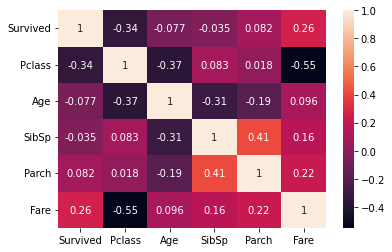

In [15]:
sns.heatmap(train_data.corr(), annot=True)
plt.show()

#### The above heatmap gives the correlation between various features in the training data.

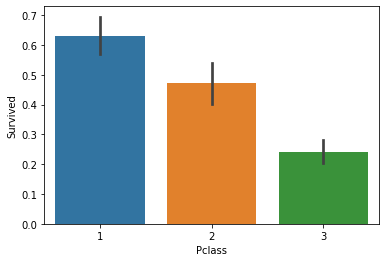

In [16]:
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.show()

#### The above bar graph clearly shows that passengers travelling in the class 1 had more chances of survival. This will be a good feature for prediction.

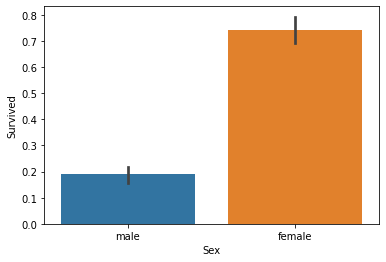

In [17]:
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.show()

#### The above bar graph clearly shows that female passengers had more chances of survival. This will be a good feature for prediction

### HANDLING MISSING DATA

In [18]:
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


#### The above results show people who embarked at 'C' had more survival rate.

In [19]:
#There are two values missing in the Embarked Column of trainng data, they can be replaced with the highest frequency

m=train_data.Embarked.dropna().mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(m, inplace= True)

In [20]:
#One value in Fare column of the test dataset is missing and it can be filled with median value

test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [21]:
#The missing values in the age column are filled wih the mean of the ages

train_data['Age'] = train_data.Age.fillna(train_data.Age.mean())
test_data['Age'] = test_data.Age.fillna(test_data.Age.mean())

In [22]:
#As most of the values in the cabin column are missing in both the training and testing dataset, that column can be dropped from the dataset.

train_data.drop(['Cabin'], axis=1, inplace=True)
test_data.drop(['Cabin'], axis=1, inplace=True)

### NEW FEATURE EXTRACTION

In [23]:
#The name column are having some common titles which can be used for the prediction
#Extracting common Titles from the names

train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [24]:
train_data['Title'] = train_data['Title'].replace(['Ms','Mlle'], 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')
train_data['Title'] = train_data['Title'].replace(['Countess', 'Sir', 'Jonkheer', 'Lady', 'Don', 'Dona','Dr', 'Rev', 'Col', 'Major', 'Capt'], 'Others')

In [25]:
test_data['Title'] = test_data['Title'].replace(['Ms','Mlle'], 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')
test_data['Title'] = test_data['Title'].replace(['Countess', 'Sir', 'Jonkheer', 'Lady', 'Don', 'Dona','Dr', 'Rev', 'Col', 'Major', 'Capt'], 'Others')

#### Since we extracted the Title feature from the name, the Name Feature can be dropped.
#### Also the Ticket values are highly diversified and hence they can be dropped as well.

In [26]:
train_data.drop(['Name'], axis=1, inplace=True)
test_data.drop(['Name'], axis=1, inplace=True)
train_data.drop(['Ticket'], axis=1, inplace=True)
test_data.drop(['Ticket'], axis=1, inplace=True)

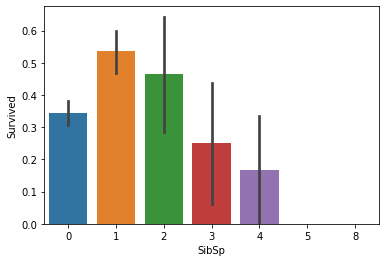

In [27]:
sns.barplot(x='SibSp', y='Survived', data=train_data)
plt.show()

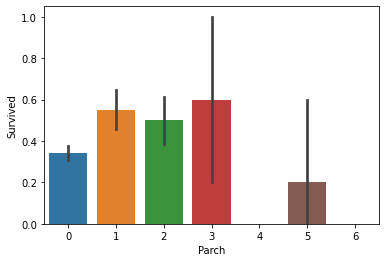

In [28]:
sns.barplot(x='Parch', y='Survived', data=train_data)
plt.show()

#### The above bar plots doesn't really help in prediction, so we can group them and form a new feature called Family classify them as travelling with or without family. 
#### And we can drop both the SibSp, Parch features.

In [29]:
train_data['Family'] = np.where(train_data['SibSp'] + train_data['Parch'] > 0, 1, 0)
test_data['Family'] = np.where(test_data['SibSp'] + test_data['Parch'] > 0, 1, 0)
train_data.drop(['SibSp', 'Parch'], axis= 1, inplace= True)
test_data.drop(['SibSp', 'Parch'], axis= 1, inplace= True)

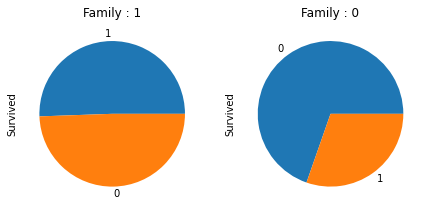

In [30]:
fig = plt.figure(figsize=(15,8))
i = 1
for f in train_data['Family'].unique():
    fig.add_subplot(2, 4, i)
    plt.title('Family : {}'.format(f))
    train_data.Survived[train_data['Family'] == f].value_counts().plot(kind='pie')
    i += 1

### CONVERTING CATEGORICAL DATA INTO NUMERICAL DATA BY ENCODING

In [31]:
label = LabelEncoder()

train_data.Sex = label.fit_transform(train_data['Sex'])
test_data.Sex = label.fit_transform(test_data['Sex'])

train_data.Embarked = label.fit_transform(train_data['Embarked'])
test_data.Embarked = label.fit_transform(test_data['Embarked'])

train_data.Title = label.fit_transform(train_data['Title'])
test_data.Title = label.fit_transform(test_data['Title'])

### FEATURE SCALING

In [32]:
# Scalling helps to normalize the data within a particular range.

In [33]:
scaler = StandardScaler()
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])
test_data[['Age', 'Fare']] = scaler.fit_transform(test_data[['Age', 'Fare']])

In [34]:
X_Train_Data = train_data.drop("Survived", axis=1)
Y_Train_Data = train_data["Survived"]

### PREDICTION USING RANDOM FOREST MODEL

In [35]:
param_rf = {'n_estimators': [100,150,200,250,300,350,400],
               'max_depth': [1,2,3,4,5,6,7,8],
}

In [36]:
rf = RandomForestClassifier()
model = GridSearchCV(estimator = rf, param_grid= param_rf, cv = 5)

In [37]:
model.fit(X_Train_Data, Y_Train_Data)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400]})

In [38]:
accuracy = model.best_score_
accuracy

0.8361559224154165

In [39]:
Survival = model.predict(test_data)
Survival

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [40]:
data = pd.DataFrame({"PassengerId":test_data.index, "Survived": Survival})

In [41]:
data.to_csv(r'C:\Users\vardh\OneDrive\Desktop\Titanic Dataset\Titanic_Competition_Final_Submission.csv', index = False)